# Task 2: Prediction using Unsupervised ML
* ### From the given 'Iris' dataset, predict the optimum number of
 ### clusters and represent it visually.
- #### Author: Apurv P Chudasama
- #### Data Science and Business Analytics Intern
- #### GRIP @The Sparks Foundation

In [63]:
# Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

In [64]:
# Load the Iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Display the first 5 rows of the dataset
iris_df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [65]:
# Finding the optimum number of clusters for K-means classification
x = iris_df.iloc[:, [0, 1, 2, 3]].values
from sklearn.cluster import KMeans

wcss = []  # Initialize a list to store the Within-Cluster-Sum-of-Squares (WCSS) values

# Iterate over different numbers of clusters to find the optimal k
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++',
                    max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

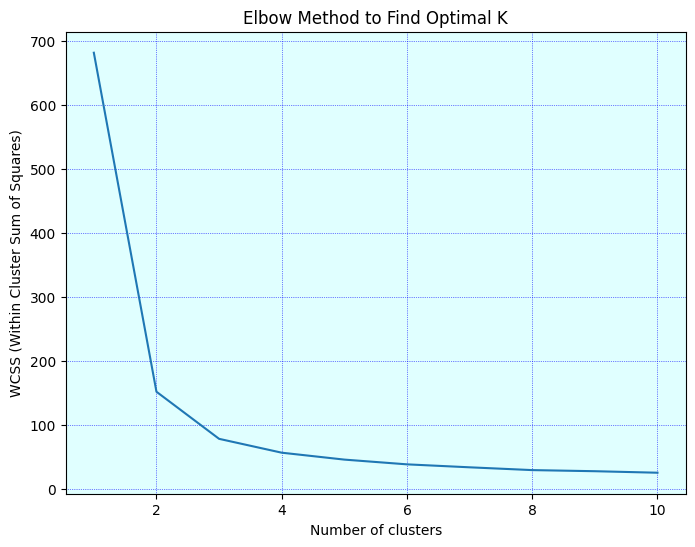

In [66]:
# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Set a background color for the plot
ax.set_facecolor('#E0FFFF')  # Light gray background color

# Add grid lines
plt.grid(color='blue', linestyle=':', linewidth=0.5)

# Plotting the WCSS values to determine the elbow point
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within Cluster Sum of Squares)')
plt.title('Elbow Method to Find Optimal K')
plt.show()

In [67]:
# Creating the K-means classifier with the chosen number of clusters
kmeans = KMeans(n_clusters=3, init='k-means++',
                max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(x)

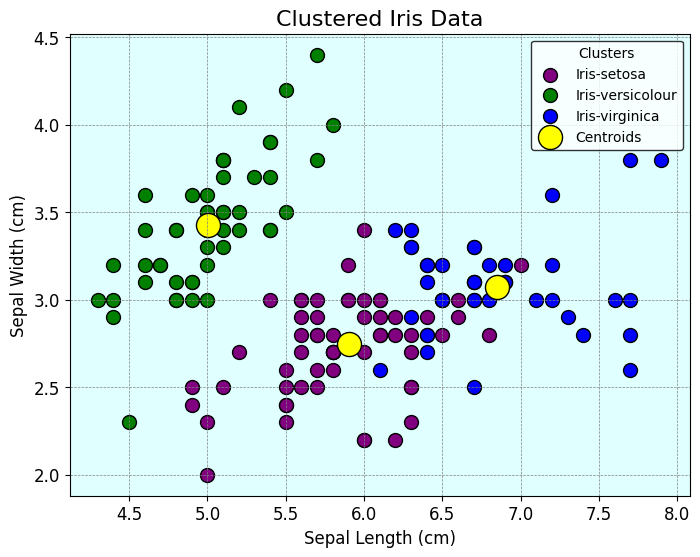

In [68]:
# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Set a background color for the plot
ax.set_facecolor('#E0FFFF')  # Light gray background color

# Visualizing the clusters with different colors and symbols
scatter1 = plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],
            s=100, c='purple', marker='o', edgecolors='black', label='Iris-setosa')
scatter2 = plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],
            s=100, c='green', marker='o', edgecolors='black', label='Iris-versicolour')
scatter3 = plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s=100, c='blue', marker='o', edgecolors='black', label='Iris-virginica')

# Plotting the centroids of the clusters
centroids = plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='yellow', marker='o', edgecolors='black', label='Centroids')

# Add a legend with a white background
legend = ax.legend(handles=[scatter1, scatter2, scatter3, centroids], loc='upper right', facecolor='white')
legend.set_title('Clusters')
frame = legend.get_frame()
frame.set_edgecolor('black')

# Customize the appearance of the plot
plt.title('Clustered Iris Data', fontsize=16)
plt.xlabel('Sepal Length (cm)', fontsize=12)
plt.ylabel('Sepal Width (cm)', fontsize=12)
plt.grid(color='grey', linestyle='--', linewidth=0.5)  # Add grid lines
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot with the specified background color and design elements
plt.show()